# **Core Components of a Neural Network in pytorch**

In PyTorch, a neural network consists of several core components, each playing a role in defining, training, and optimizing the model.

# 1. Tensors (Data Representation)

* PyTorch uses torch.Tensor as the fundamental data structure.

* Supports GPU acceleration (torch.cuda.Tensor).

In [1]:
import torch
x = torch.tensor([[1.0, 2.0], [3.0, 4.0]], requires_grad=True)
x

tensor([[1., 2.],
        [3., 4.]], requires_grad=True)

# 2. Model (Neural Network Architecture)

* Defined using torch.nn.Module.

* Layers and forward pass are specified in forward().



In [2]:
import torch.nn as nn

class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(10, 5)  # Fully connected layer
        self.relu = nn.ReLU()        # Activation function
        self.fc2 = nn.Linear(5, 1)   # Output layer

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x


# 3. Layers

PyTorch provides several types of layers, including:

    * nn.Linear(in_features, out_features): Fully connected layer.

    * nn.Conv2d(in_channels, out_channels, kernel_size): Convolutional layer.

    * nn.LSTM(input_size, hidden_size, num_layers): Recurrent layer.

In [3]:
fc = nn.Linear(10, 5)  # Fully connected layer from 10 to 5 neurons

# 4. Activation Functions

* Add non-linearity to the model.

* Common functions:

        * nn.ReLU()

        * nn.Sigmoid()

        * nn.Tanh()

        * nn.Softmax(dim=1)

In [4]:
activation = nn.ReLU()

# 5. Loss Function

* Measures how well the model performs.

* Common choices:

      * nn.MSELoss() for regression.

      * nn.CrossEntropyLoss() for classification.

In [5]:
criterion = nn.CrossEntropyLoss()

# 6. Optimizer


* Updates weights to minimize the loss function.

* Popular choices:

      * torch.optim.SGD(model.parameters(), lr=0.01)

      * torch.optim.Adam(model.parameters(), lr=0.001)

In [7]:
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# 7. Backpropagation


* Uses loss.backward() to compute gradients.

* Updates weights using optimizer.step().

In [9]:
#optimizer.zero_grad()  # Reset gradients
#loss.backward()        # Compute gradients
#optimizer.step()       # Update weights

# 8. Training Loop

* Iterates over data, computes loss, and updates weights.

In [11]:
#for epoch in range(100):
  #optimizer.zero_grad()
  #outputs = model(inputs)
  #loss = criterion(outputs, targets)
  #loss.backward()
  #optimizer.step()


# 9. Dataset and Dataloader

* PyTorch provides torch.utils.data.Dataset and DataLoader to handle large datasets.

In [13]:
from torch.utils.data import DataLoader, TensorDataset

# Example data - replace with your actual data
inputs = torch.tensor([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
targets = torch.tensor([0, 1, 0])

dataset = TensorDataset(inputs, targets)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)


# 10. GPU Support

* Move tensors and models to GPU for faster computation.

In [15]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#model.to(device)
#inputs = inputs.to(device)

These components form the backbone of a neural network in PyTorch.

# **Activation Functions in PyTorch: Sigmoid, Tanh, ReLU, Softmax**


Activation functions introduce non-linearity into a neural network, allowing it to learn complex patterns. PyTorch provides built-in activation functions in torch.nn.functional and torch.nn.

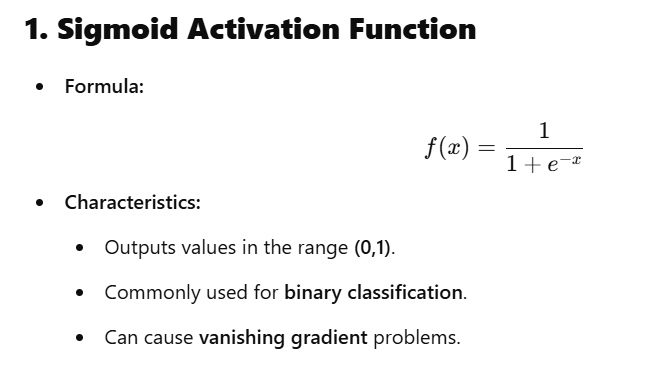

**PyTorch Implementation:**

In [3]:
import torch
import torch.nn.functional as F

x = torch.tensor([-2.0, -1.0, 0.0, 1.0, 2.0])
sigmoid_output = torch.sigmoid(x)
print(sigmoid_output)


tensor([0.1192, 0.2689, 0.5000, 0.7311, 0.8808])


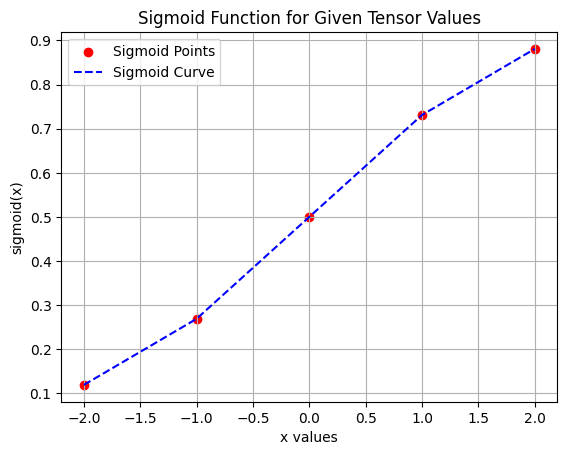

In [1]:
import torch
import matplotlib.pyplot as plt

# Given PyTorch tensors
x = torch.tensor([-2.0, -1.0, 0.0, 1.0, 2.0])
sigmoid_output = torch.sigmoid(x)

# Convert tensors to NumPy for Matplotlib
x_np = x.numpy()
y_np = sigmoid_output.numpy()

# Plot the data
plt.scatter(x_np, y_np, color='red', label='Sigmoid Points')
plt.plot(x_np, y_np, linestyle='dashed', color='blue', label='Sigmoid Curve')

# Labels and title
plt.xlabel('x values')
plt.ylabel('sigmoid(x)')
plt.title('Sigmoid Function for Given Tensor Values')
plt.legend()
plt.grid()
plt.show()


In [4]:
F.sigmoid(x)  # Functional API

tensor([0.1192, 0.2689, 0.5000, 0.7311, 0.8808])

# **2. Tanh (Hyperbolic Tangent) Activation Function**

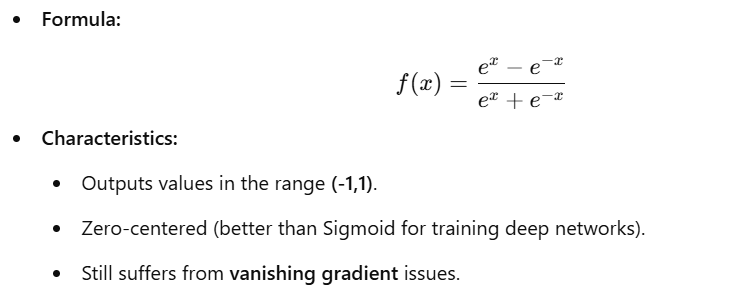

In [5]:
tanh_output = torch.tanh(x)
print(tanh_output)

tensor([-0.9640, -0.7616,  0.0000,  0.7616,  0.9640])


In [6]:
F.tanh(x)  # Functional API

tensor([-0.9640, -0.7616,  0.0000,  0.7616,  0.9640])

# **3. ReLU (Rectified Linear Unit) Activation Function**

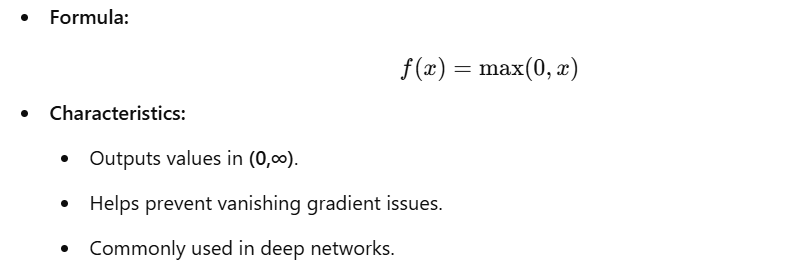

In [7]:
relu_output = F.relu(x)
print(relu_output)


tensor([0., 0., 0., 1., 2.])


In [8]:
relu_layer = torch.nn.ReLU()
relu_output = relu_layer(x)


# **4. Softmax Activation Function**

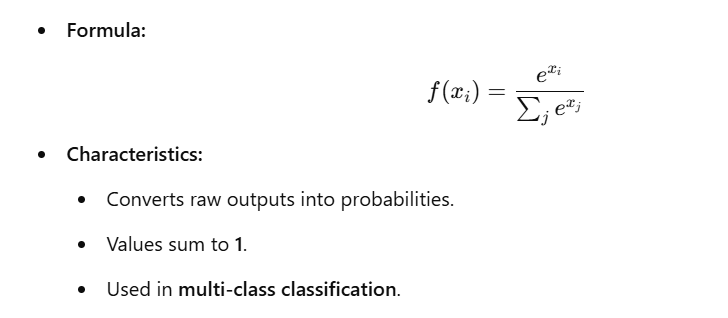

In [9]:
x = torch.tensor([2.0, 1.0, 0.1])  # Example logits
softmax_output = F.softmax(x, dim=0)
print(softmax_output)


tensor([0.6590, 0.2424, 0.0986])


In [10]:
softmax_layer = torch.nn.Softmax(dim=0)
softmax_output = softmax_layer(x)


# **Comparison of Activation Functions**

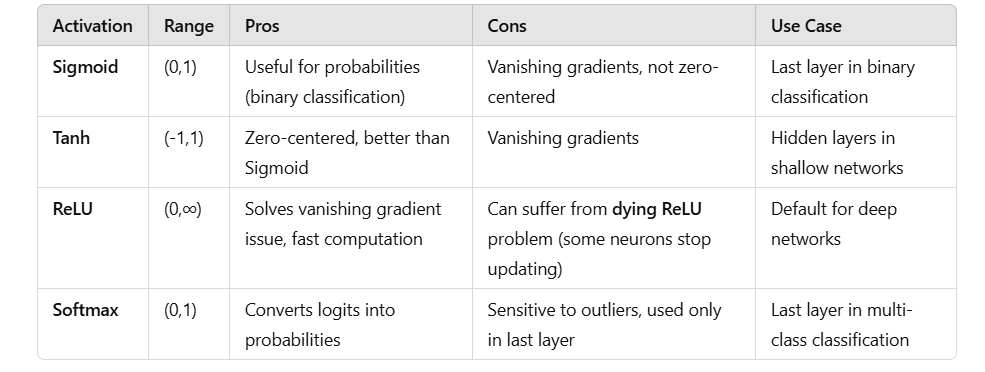

# **Example: Using All Activation Functions in a PyTorch Model**

In [11]:
import torch.nn as nn

class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(10, 5)
        self.tanh = nn.Tanh()
        self.fc2 = nn.Linear(5, 3)
        self.relu = nn.ReLU()
        self.fc3 = nn.Linear(3, 2)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.tanh(x)  # Applying Tanh
        x = self.fc2(x)
        x = self.relu(x)  # Applying ReLU
        x = self.fc3(x)
        x = self.sigmoid(x)  # Applying Sigmoid
        return x


* Tanh → Used in the first layer.

* ReLU → Used in the second layer.

* Sigmoid → Used in the output layer (for binary classification).



For multi-class classification, replace Sigmoid with Softmax:

In [13]:
import torch.nn as nn

class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(10, 5)
        self.tanh = nn.Tanh()
        self.fc2 = nn.Linear(5, 3)
        self.relu = nn.ReLU()
        self.fc3 = nn.Linear(3, 2)
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1) # Initializing softmax in __init__

    def forward(self, x):
        x = self.fc1(x)
        x = self.tanh(x)  # Applying Tanh
        x = self.fc2(x)
        x = self.relu(x)  # Applying ReLU
        x = self.fc3(x)
        x = self.sigmoid(x)  # Applying Sigmoid
        return x # You might want to apply softmax here depending on your model architecture

# **Loss functions: MSE, Cross Entropy**

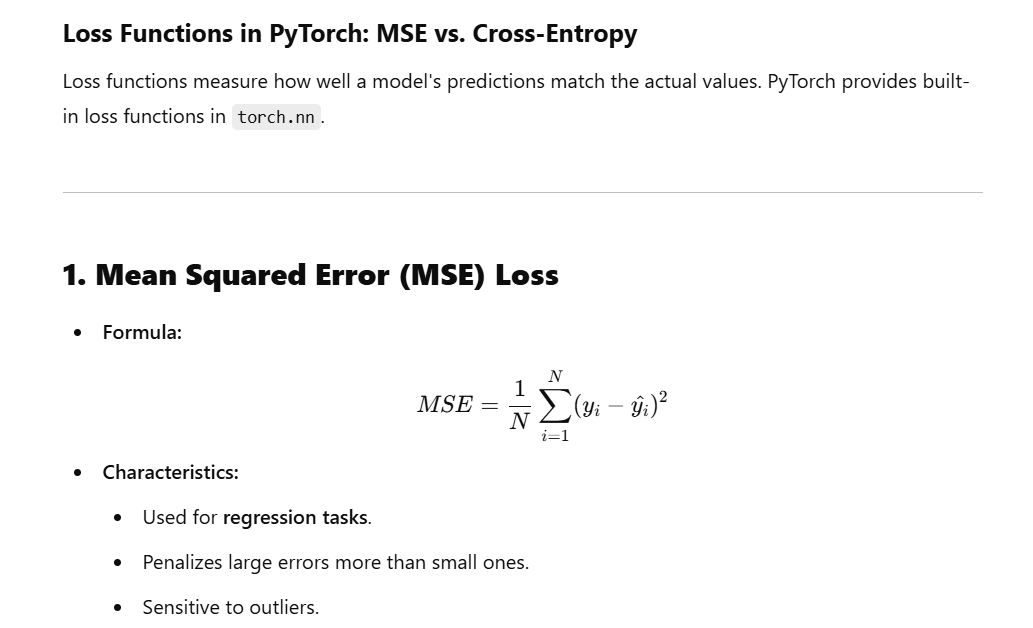

In [14]:
import torch
import torch.nn as nn

# Predicted values (regression)
y_pred = torch.tensor([2.5, 0.0, 2.1, 8.7])
# True values
y_true = torch.tensor([3.0, -0.5, 2.0, 7.0])

# Define MSE loss
mse_loss = nn.MSELoss()

# Compute loss
loss_value = mse_loss(y_pred, y_true)
print("MSE Loss:", loss_value.item())


MSE Loss: 0.8499998450279236


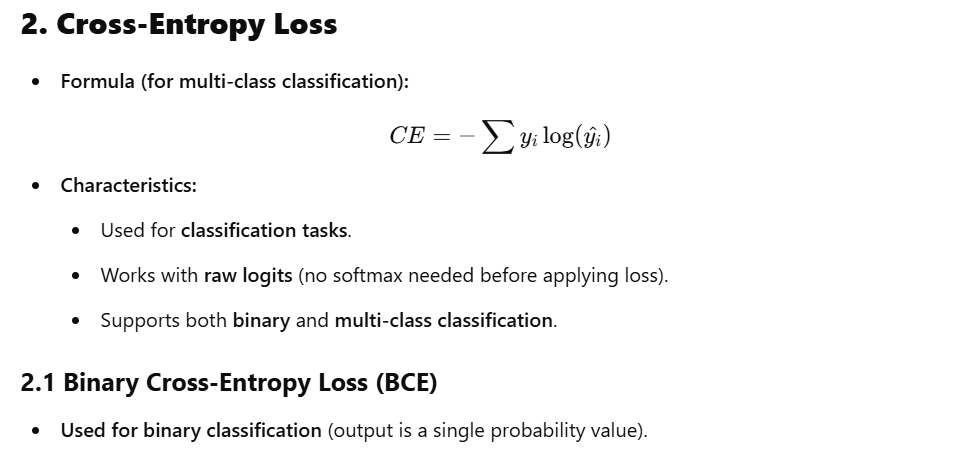

In [15]:
y_pred = torch.tensor([0.9, 0.2, 0.1, 0.7])  # Probabilities
y_true = torch.tensor([1.0, 0.0, 0.0, 1.0])  # True labels

bce_loss = nn.BCELoss()  # Binary Cross Entropy Loss
loss_value = bce_loss(y_pred, y_true)
print("BCE Loss:", loss_value.item())


BCE Loss: 0.19763490557670593


**Alternative**: If your model outputs raw logits, use nn.BCEWithLogitsLoss(), which applies a sigmoid internally:

In [16]:
bce_logits_loss = nn.BCEWithLogitsLoss()


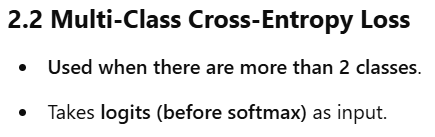

In [17]:
y_pred = torch.tensor([[2.0, 1.0, 0.1], [0.5, 2.0, 0.3]])  # Raw logits
y_true = torch.tensor([0, 1])  # Class labels (0, 1, 2)

ce_loss = nn.CrossEntropyLoss()
loss_value = ce_loss(y_pred, y_true)
print("Cross Entropy Loss:", loss_value.item())


Cross Entropy Loss: 0.37882310152053833


**Why No Softmax?**



CrossEntropyLoss automatically applies Softmax, so don’t add it in your model before computing the loss.

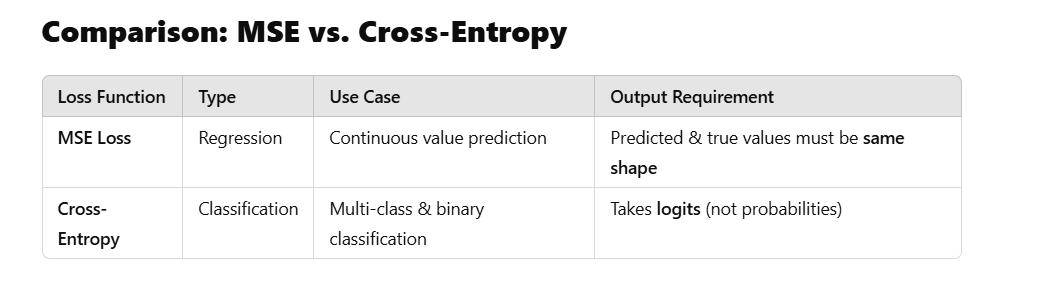

**code**

In [18]:
import torch.nn as nn

class NeuralNet(nn.Module):
    def __init__(self, input_size, output_size, task_type="classification"):
        super(NeuralNet, self).__init__()
        self.fc = nn.Linear(input_size, output_size)
        self.task_type = task_type

    def forward(self, x):
        x = self.fc(x)
        if self.task_type == "classification":
            return x  # Logits for CrossEntropyLoss
        else:
            return torch.sigmoid(x)  # Regression (for BCE loss)

# Classification Model
clf_model = NeuralNet(input_size=5, output_size=3, task_type="classification")
clf_loss_fn = nn.CrossEntropyLoss()

# Regression Model
reg_model = NeuralNet(input_size=5, output_size=1, task_type="regression")
reg_loss_fn = nn.MSELoss()


**When to Use Which?**


* Use MSELoss for regression problems (e.g., house price prediction).

* Use CrossEntropyLoss for classification problems (e.g., image classification).